In [3]:
import chromadb
from chromadb.utils import embedding_functions
import embedClustering
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import tqdm

from sklearn.cluster import HDBSCAN

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from SonarEmbeddingFunction import SonarEmbeddingFunction

from tqdm import tqdm

In [4]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
from chromadb import Documents, EmbeddingFunction, Embeddings
from sonar.inference_pipelines.text import TextToEmbeddingModelPipeline


In [6]:
import torch
device = torch.device("mps")
device

device(type='mps')

In [7]:
embedding_func = SonarEmbeddingFunction()

In [23]:
CHROMA_DATA_PATH = "chroma_data/"
COLLECTION_NAME = "twitter-election2020"

client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

In [24]:
collection = client.get_collection(COLLECTION_NAME, embedding_function=embedding_func)

In [25]:
collection.peek(0)['embeddings'][0]

array([ 1.14425588e-02, -2.48416691e-05,  7.52648385e-03, ...,
       -1.71165317e-02,  3.68376169e-03,  4.30903817e-03])

In [26]:
query_results = collection.query(
    query_texts=["The End"],
    n_results=5
)
query_results

{'ids': [['id990', 'id842', 'id212', 'id50', 'id301']],
 'embeddings': None,
 'documents': [['the best is yet to come trump',
   'trump for prison',
   'ahane biden',
   'trump caravan on the',
   'biden after winning election']],
 'uris': None,
 'data': None,
 'metadatas': [[{'collected_at': '2020-11-02 17:06:22.043816',
    'created_at': '2020-11-01 21:38:01',
    'likes': 2.0,
    'retweet_count': 1.0,
    'side': 'Trump',
    'source': 'Twitter for iPhone',
    'tweet': 'The Best  is yet to come #Trump https://t.co/Cu1CHS1ekv',
    'tweet_id': 1.323016469668651e+18,
    'user_description': "Toute nation a le gouvernement qu'elle mérite. Europe, Jeunesse, Reconquête! ⚜️Vive le roi! #NiChariaNiCharlie",
    'user_followers_count': 615.0,
    'user_id': 1454703865.0,
    'user_join_date': '2013-05-24 16:48:11',
    'user_name': 'Joseph de M.',
    'user_screen_name': 'jdmaistre'},
   {'collected_at': '2020-11-08 10:55:03.192762',
    'continent': 'North America',
    'country': 'Unite

In [27]:
embeddings = np.array(collection.get(include=['embeddings'])['embeddings'])
len(embeddings), len(embeddings[0])

(1000, 1024)

In [28]:
documents = np.array(collection.get(include=['documents'])['documents'])

In [29]:
documents[0]

'is she one of those over kids who can not be reunited with parents who do care thanks to the trump gop government'

In [30]:
embeddings[0]

array([ 1.14425588e-02, -2.48416691e-05,  7.52648385e-03, ...,
       -1.71165317e-02,  3.68376169e-03,  4.30903817e-03])

In [31]:
reduced_embeddings = embedClustering.tsneReduceEMB(embeddings)

In [32]:
reduced_embeddings[:10]

array([[ 5.22323   ,  3.2884183 ],
       [ 4.255955  ,  1.5391306 ],
       [ 0.16876307, -1.8102212 ],
       [-2.7907205 ,  0.3264412 ],
       [ 0.45125464, -1.6809074 ],
       [ 1.0463094 , -5.191731  ],
       [ 3.8605824 ,  2.8736753 ],
       [-6.6666536 , -3.9988902 ],
       [ 4.401746  ,  1.7231102 ],
       [ 2.85595   ,  5.531152  ]], dtype=float32)

In [33]:
k_nearest_neighbors = 3

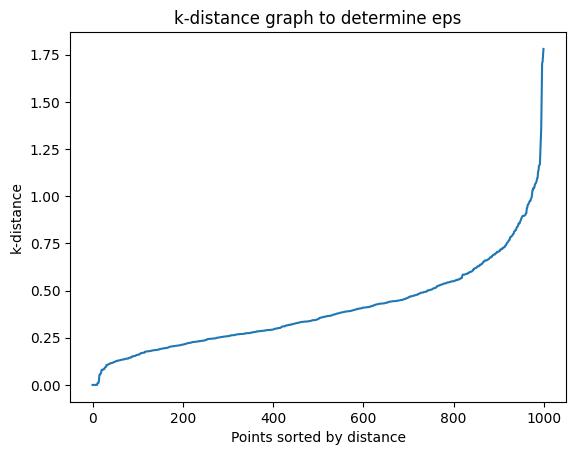

0.8990386843938541

In [34]:
optimal_eps = embedClustering.findEPS(reduced_embeddings, k=k_nearest_neighbors)
optimal_eps


In [35]:
labels, n_clusters, n_noise = embedClustering.hdbscanEMB(reduced_embeddings, min_samples=k_nearest_neighbors)

Estimated number of clusters: 61
Estimated number of noise points: 405


In [115]:
labels, n_clusters, n_noise = embedClustering.dbscanEMB(reduced_embeddings, eps=0.7, min_samples=k_nearest_neighbors)

Estimated number of clusters: 1483
Estimated number of noise points: 2986


In [36]:
db = HDBSCAN(min_samples=k_nearest_neighbors, n_jobs=-1).fit(reduced_embeddings)

labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

Estimated number of clusters: 61
Estimated number of noise points: 405


In [37]:
tsne_df = pd.DataFrame(reduced_embeddings, columns=['Component 1', 'Component 2'])
tsne_df['text'] =  [doc[:40] for doc in documents]
tsne_df['cluster'] = labels


fig = px.scatter(
    tsne_df,
    x='Component 1',
    y='Component 2',
    color='cluster',
    hover_data=['text'],
    #color_continuous_scale=px.colors.diverging.BrBG
)
fig.show()

In [26]:
print(labels[:10])

[ 374 1138 1426   -1  328  604  757  523  390  849]


In [27]:
print(n_clusters)

1465


In [28]:
len(embeddings), len(embeddings[0])

(18013, 1024)

In [29]:
len(labels)

18013

In [30]:
#create array of n_clusters empty lists
index_cluster = [[] for i in range(n_clusters)]
print(index_cluster)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [31]:
len(index_cluster)

1465

In [32]:
index_cluster[3] 

[]

In [33]:
for i in range(len(labels)):
    label = labels[i]
    if label != -1:
        index_cluster[label].append(i)
    if label == 1496:
        print("found at:", i)
index_cluster[2]

[859, 4769, 8685, 11586, 12171, 12455, 15019, 16658]

In [34]:
len(index_cluster)

1465

In [35]:
clustered_embeddings = []

for i in index_cluster:
    cluster_e = []
    for j in i:
        cluster_e.append(embeddings[j])
    average_cluster_e = sum(cluster_e) / len(cluster_e)
    clustered_embeddings.append(average_cluster_e)
    
clustered_embeddings = np.array(clustered_embeddings)


In [36]:
clustered_embeddings.shape

(1465, 1024)

In [37]:
embeddings.shape

(18013, 1024)

In [38]:
import torch
device = torch.device("mps")
device

device(type='mps')

In [39]:
print(clustered_embeddings.shape)
print(type(clustered_embeddings))
clustered_embeddings = torch.from_numpy(clustered_embeddings.astype(np.float32))
print(clustered_embeddings.shape)
print(type(clustered_embeddings))

(1465, 1024)
<class 'numpy.ndarray'>
torch.Size([1465, 1024])
<class 'torch.Tensor'>


In [40]:
s_clustered_embeddings = clustered_embeddings[:2]

In [41]:
from sonar.inference_pipelines.text import EmbeddingToTextModelPipeline


In [42]:
vec2text_model = EmbeddingToTextModelPipeline(decoder="text_sonar_basic_decoder",
                                              tokenizer="text_sonar_basic_encoder",
                                              device=device)

In [43]:
reconstructed = vec2text_model.predict(clustered_embeddings, target_lang="eng_Latn", progress_bar=True, max_seq_len=10)

# max_seq_len is a keyword argument passed to the fairseq2 BeamSearchSeq2SeqGenerator.
print(reconstructed)
# ['My name is SONAR.', 'I can embed the sentences into vector space.']

  0%|          | 0/293 [00:00<?, ?it/s]

DataPipelineError: The map operation has failed. See nested exception for details.

In [37]:
clustered_embeddings = clustered_embeddings.numpy()

In [38]:
print(type(embeddings))
print(type(clustered_embeddings))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [39]:
print(sum(embeddings[0])/len(embeddings[0]))
print(sum(clustered_embeddings[0])/len(clustered_embeddings[0]))

8.82665064949606e-06
3.42779240058988e-05


In [45]:
e_1 = len(embeddings)
print(e_1)
ce_1 =  len(clustered_embeddings)
print(ce_1)
print()
print("total len:", e_1 + ce_1)
print()
all_embeddings = np.concatenate((embeddings, clustered_embeddings), axis=0)
print(all_embeddings.shape)

18013
1454

total len: 19467

(19467, 1024)


In [46]:
all_reduced_embeddings  = embedClustering.tsneReduceEMB(all_embeddings)

In [86]:
reduced_clustered_embeddings = all_reduced_embeddings[e_1:]
print(reduced_clustered_embeddings.shape)

reduced_first_embeddings = all_reduced_embeddings[:e_1]
print(reduced_first_embeddings.shape)

(1454, 2)
(18013, 2)


In [82]:
reduced_clustered_embeddings[:10]

array([[-64.59525   , -22.837395  ],
       [-63.784157  ,  -0.41191578],
       [-41.575294  , -37.33531   ],
       [-48.6857    , -33.26639   ],
       [-39.712646  ,  47.19744   ],
       [-55.88133   ,  18.239592  ],
       [-36.901573  , -44.73168   ],
       [-47.938927  , -13.464346  ],
       [-57.956944  ,  10.699148  ],
       [-43.97452   , -26.740438  ]], dtype=float32)

In [83]:
k_nearest_neighbors = 3

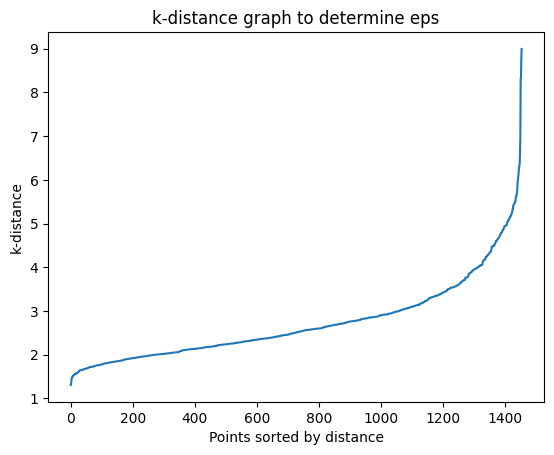

5.086334995575122

In [87]:
optimal_eps = embedClustering.findEPS(reduced_clustered_embeddings, k=k_nearest_neighbors)
optimal_eps


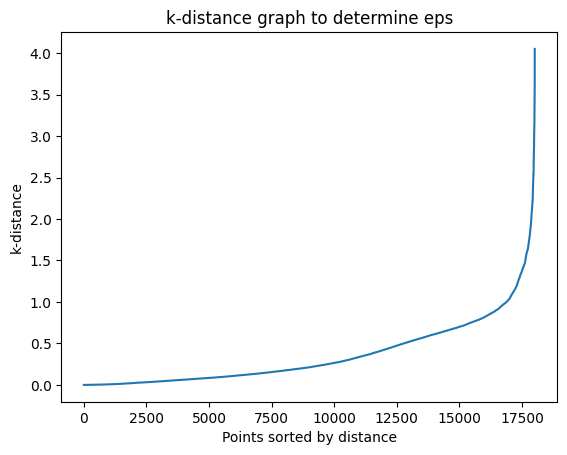

2.8413170219747292

In [88]:
first_optimal_eps = embedClustering.findEPS(reduced_first_embeddings, k=k_nearest_neighbors)
first_optimal_eps

In [151]:
labels_clustered, n_clusters, n_noise = embedClustering.hdbscanEMB(reduced_clustered_embeddings, min_samples=k_nearest_neighbors)

Estimated number of clusters: 14
Estimated number of noise points: 245


In [1]:
db = HDBSCAN(min_samples=k_nearest_neighbors).fit(embeddings)

labels_first = db.labels_

n_clusters = len(set(labels_first)) - (1 if -1 in labels_first else 0)
n_noise = list(labels_first).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

NameError: name 'HDBSCAN' is not defined

In [143]:
len(labels_clustered)

1454

In [144]:
len(labels_first)

18013

In [145]:
cluster_prev = list(range(len(clustered_embeddings)))
len(cluster_prev)

1454

In [146]:
len(reduced_clustered_embeddings)

1454

In [147]:

tsne_df = pd.DataFrame(reduced_clustered_embeddings, columns=['Component 1', 'Component 2'])
tsne_df['text'] = [doc[:40] for doc in reconstructed]
tsne_df['cluster'] = cluster_prev
#Arabic, Chinese, Dutch, English, French, German, Italian, Korean, Polish, Portuguese, Russian, Spanish, Turkish

#selected_languages = ['af', 'am', 'ast', 'arz', 'ar', 'ary', 'ckb', 'cy', 'da', 'de', 'fr', 'fur', 'din', 'el', 'eo', 'et', 'eu', 'fo', 'fa', 'is', 'it', 'jv', 'ja', 'kab', 'ka', 'kn', 'ks', 'kk', 'th', 'km', 'azb', 'az', 'ba', 'ban', 'be', 'bn', 'bh', 'bo', 'bs', 'bg', 'ca', 'ceb', 'cs', 'ckb', 'fi', 'gd', 'ga', 'gl', 'gn', 'gu', 'ht', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'ig', 'ilo', 'id', 'ky', 'ko', 'ku', 'lo', 'lv', 'lij', 'li', 'lt', 'lmo', 'lb']

#tsne_df = tsne_df[tsne_df["language"].isin(selected_languages)]


fig = px.scatter(
    tsne_df,
    x='Component 1',
    y='Component 2',
    color='cluster',    
    hover_data=['text'],
    title="Average Clustered Embeddings"
    #color_continuous_scale=px.colors.diverging.BrBG
)


fig.show()

In [148]:
#fig.write_html("./exportClusters/interactive_plot1_ace_sonar.html")


In [149]:

tsne_df = pd.DataFrame(reduced_first_embeddings, columns=['Component 1', 'Component 2'])
tsne_df['text'] = [doc[:40] for doc in documents]
tsne_df['cluster'] = labels_first
#Arabic, Chinese, Dutch, English, French, German, Italian, Korean, Polish, Portuguese, Russian, Spanish, Turkish

#selected_languages = ['af', 'am', 'ast', 'arz', 'ar', 'ary', 'ckb', 'cy', 'da', 'de', 'fr', 'fur', 'din', 'el', 'eo', 'et', 'eu', 'fo', 'fa', 'is', 'it', 'jv', 'ja', 'kab', 'ka', 'kn', 'ks', 'kk', 'th', 'km', 'azb', 'az', 'ba', 'ban', 'be', 'bn', 'bh', 'bo', 'bs', 'bg', 'ca', 'ceb', 'cs', 'ckb', 'fi', 'gd', 'ga', 'gl', 'gn', 'gu', 'ht', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'ig', 'ilo', 'id', 'ky', 'ko', 'ku', 'lo', 'lv', 'lij', 'li', 'lt', 'lmo', 'lb']

#tsne_df = tsne_df[tsne_df["language"].isin(selected_languages)]


fig = px.scatter(
    tsne_df,
    x='Component 1',
    y='Component 2',
    color='cluster',    
    hover_data=['text'],
    title="Average Clustered Embeddings"
    #color_continuous_scale=px.colors.diverging.BrBG
)


fig.show()

In [103]:
len(reconstructed)

1454

In [129]:
reconstructed[1496]

IndexError: list index out of range